In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/deceptive-opinion.csv')

In [ ]:
df

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...
...,...,...,...,...,...
1595,deceptive,intercontinental,negative,MTurk,Problems started when I booked the InterContin...
1596,deceptive,amalfi,negative,MTurk,The Amalfi Hotel has a beautiful website and i...
1597,deceptive,intercontinental,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...
1598,deceptive,palmer,negative,MTurk,"The Palmer House Hilton, while it looks good i..."


In [ ]:
df.isnull().sum()

deceptive    0
hotel        0
polarity     0
source       0
text         0
dtype: int64

In [ ]:
df['hotel'].unique()

array(['conrad', 'hyatt', 'omni', 'fairmont', 'sheraton', 'knickerbocker',
       'homewood', 'swissotel', 'ambassador', 'affinia', 'hardrock',
       'talbott', 'hilton', 'james', 'monaco', 'sofitel', 'palmer',
       'intercontinental', 'allegro', 'amalfi'], dtype=object)

In [ ]:
df['source'].unique()

array(['TripAdvisor', 'MTurk', 'Web'], dtype=object)

<Axes: xlabel='deceptive', ylabel='count'>

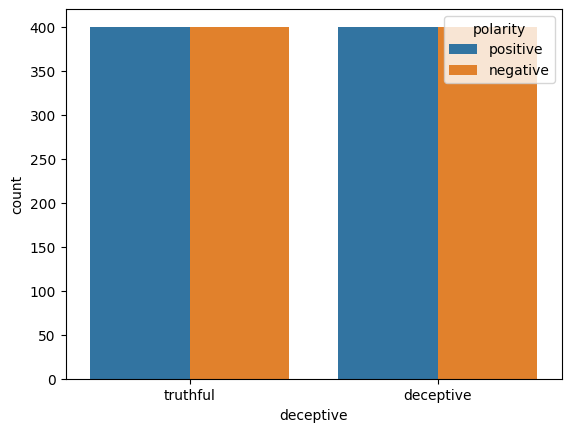

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=df['deceptive'],hue='polarity',data=df)

<Axes: xlabel='deceptive', ylabel='count'>

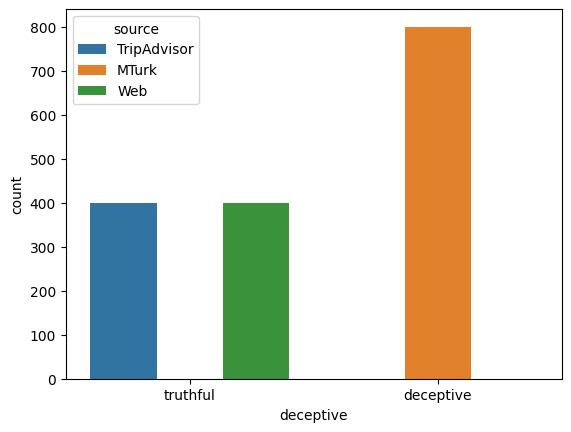

In [ ]:
sns.countplot(x=df['deceptive'],hue='source',data=df)

<Axes: xlabel='deceptive', ylabel='count'>

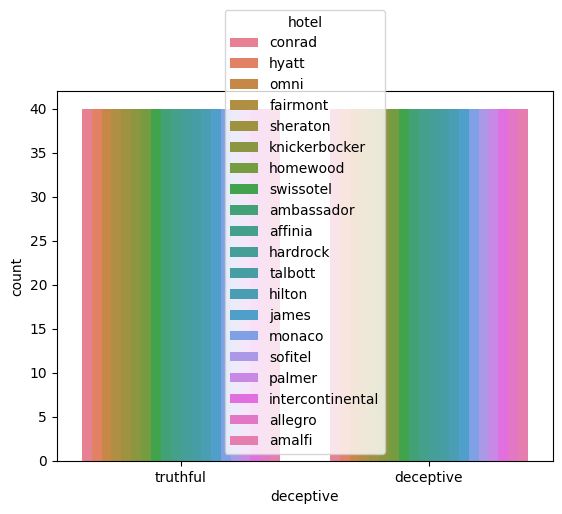

In [ ]:
sns.countplot(x=df['deceptive'],hue='hotel',data=df)

In [ ]:
#drop the feature hotel
df=df.drop(['hotel'],axis=1)

In [ ]:
df

,deceptive,polarity,source,text
0,truthful,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,positive,TripAdvisor,I asked for a high floor away from the elevato...
...,...,...,...,...
1595,deceptive,negative,MTurk,Problems started when I booked the InterContin...
1596,deceptive,negative,MTurk,The Amalfi Hotel has a beautiful website and i...
1597,deceptive,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...
1598,deceptive,negative,MTurk,"The Palmer House Hilton, while it looks good i..."


In [ ]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import string
def text_cleaning(text):
    '''
    Make text lowercase, remove text in square brackets,remove links,remove special characters
    and remove words containing numbers.
    '''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) # remove special chars
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)

    return text

In [ ]:
df['text']=df['text'].apply(text_cleaning)

In [ ]:
df

,deceptive,polarity,source,text
0,truthful,positive,TripAdvisor,we stayed for a one night getaway with family ...
1,truthful,positive,TripAdvisor,triple a rate with upgrade to view room was le...
2,truthful,positive,TripAdvisor,this comes a little late as i m finally catchi...
3,truthful,positive,TripAdvisor,the omni chicago really delivers on all fronts...
4,truthful,positive,TripAdvisor,i asked for a high floor away from the elevato...
...,...,...,...,...
1595,deceptive,negative,MTurk,problems started when i booked the intercontin...
1596,deceptive,negative,MTurk,the amalfi hotel has a beautiful website and i...
1597,deceptive,negative,MTurk,the intercontinental chicago magnificent mile ...
1598,deceptive,negative,MTurk,the palmer house hilton while it looks good i...


In [ ]:
df['complete_text']=df['source'] + '' +df['text']

In [ ]:
import nltk
import re
from nltk.corpus import stopwords

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.stem.porter import PorterStemmer

In [ ]:
port_stem = PorterStemmer()

In [ ]:
def stemming(text):
    stemmed_text = re.sub('[^a-zA-Z]',' ',text)   # Removing all the punctuations, numbers etc and only keeping text
    text = re.sub("\\W"," ",text) # remove special characters
    text = re.sub('<.*?>+', '', text)
    stemmed_text =  stemmed_text.split()         # Splitting the words to apply stemming
    stemmed_text = [port_stem.stem(word) for word in  stemmed_text if not word in stopwords.words('english')]    # Stemming of all the words except Stopwords
    stemmed_text = ' '.join(stemmed_text)       # Joining all the words after stemming
    return  stemmed_text

In [ ]:
df['complete_text'] = df['complete_text'].apply(stemming)

In [ ]:
print(df)

      deceptive  polarity       source  \
0      truthful  positive  TripAdvisor   
1      truthful  positive  TripAdvisor   
2      truthful  positive  TripAdvisor   
3      truthful  positive  TripAdvisor   
4      truthful  positive  TripAdvisor   
...         ...       ...          ...   
1595  deceptive  negative        MTurk   
1596  deceptive  negative        MTurk   
1597  deceptive  negative        MTurk   
1598  deceptive  negative        MTurk   
1599  deceptive  negative        MTurk   

                                                   text  \
0     we stayed for a one night getaway with family ...   
1     triple a rate with upgrade to view room was le...   
2     this comes a little late as i m finally catchi...   
3     the omni chicago really delivers on all fronts...   
4     i asked for a high floor away from the elevato...   
...                                                 ...   
1595  problems started when i booked the intercontin...   
1596  the amalfi hotel 

In [ ]:
# nltk.download('wordnet')

In [ ]:
# from nltk.stem import WordNetLemmatizer

# lemmatizer = WordNetLemmatizer()
# def lemmatize(text):
#     lemm_reviews = re.sub('[^a-zA-Z]',' ',text)
#     lemm_reviews = lemm_reviews.split()         # Splitting the words to apply lemmatization
#     lemm_reviews = [lemmatizer.lemmatize(word) for word in lemm_reviews]    # Stemming of all the words except Stopwords
#     lemm_reviews = ' '.join(lemm_reviews)       # Joining all the words after lemmatization
#     return  lemm_reviews
# df['complete_text'] = df['complete_text'].apply(lemmatize)
# print(df)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# vectorizer = TfidfVectorizer()
# Processed_Text = vectorizer.fit_transform(df['complete_text'])

In [ ]:
# # # summarize
# print(vectorizer.vocabulary_)
# print(vectorizer.idf_)

In [ ]:
# vectorizer.get_feature_names_out()

In [ ]:
x=df['complete_text']
y=df['deceptive']

In [ ]:
x.head()

0    tripadvisorw stay one night getaway famili thu...
1    tripadvisortripl rate upgrad view room less al...
2    tripadvisorthi come littl late final catch rev...
3    tripadvisorth omni chicago realli deliv front ...
4    tripadvisori ask high floor away elev got room...
Name: complete_text, dtype: object

In [ ]:
# prompt: in x.head() i want to drop the sr no field and only keep text

x.head()[1:]


1    tripadvisortripl rate upgrad view room less al...
2    tripadvisorthi come littl late final catch rev...
3    tripadvisorth omni chicago realli deliv front ...
4    tripadvisori ask high floor away elev got room...
Name: complete_text, dtype: object

In [ ]:
print(x)

0       tripadvisorw stay one night getaway famili thu...
1       tripadvisortripl rate upgrad view room less al...
2       tripadvisorthi come littl late final catch rev...
3       tripadvisorth omni chicago realli deliv front ...
4       tripadvisori ask high floor away elev got room...
                              ...                        
1595    mturkproblem start book intercontinent chicago...
1596    mturkth amalfi hotel beauti websit interior de...
1597    mturkth intercontinent chicago magnific mile o...
1598    mturkth palmer hous hilton look good pictur ou...
1599    mturka former chicagoan appal amalfi hotel chi...
Name: complete_text, Length: 1600, dtype: object


In [ ]:
# Assuming your DataFrame is named 'df' and the column containing text is named 'text_column'
print(x.iloc[1595])


mturkproblem start book intercontinent chicago onlin hotel site got server error somehow manag get reserv wish look elsewher great chicago street fill plenti option server error continu check let holiday weekend far mani other must pushi convention troubl get serv hotel enorm give sens comfort health facil also big noisi crowd internet access day kind surpris go around corner starbuck next time pick intim place nearbi without mani server error


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
le=LabelEncoder()
y=le.fit_transform(y)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range=(1,3))

In [ ]:
print(x_train)

728     mturkif money amalfi hotel place way thread co...
48      tripadvisorfor price marriott spent night tax ...
644     mturki travel chicago husband romant weekend a...
615     mturki recent stay talbott hotel chicago famil...
757     mturkamalfi hotel chicago sever factor make on...
                              ...                        
763     mturkth intercontinent chicago conveni locat n...
835     webseri overpr room clean comfort stand mid pr...
1216    mturka friend stay hyatt regenc chicago weeken...
559     mturki stay hotel weekend thought realli nice ...
684     mturki heard friend talk hotel monaco chicago ...
Name: complete_text, Length: 1280, dtype: object


In [ ]:
x_train=cv.fit_transform(x_train)

In [ ]:
print(x_train)

  (0, 84868)	1
  (0, 83692)	1
  (0, 3791)	1
  (0, 61894)	3
  (0, 97813)	1
  (0, 145218)	1
  (0, 133008)	1
  (0, 30188)	1
  (0, 39102)	1
  (0, 74516)	1
  (0, 65228)	1
  (0, 48619)	1
  (0, 19393)	2
  (0, 5133)	2
  (0, 150404)	1
  (0, 86559)	1
  (0, 144303)	1
  (0, 109457)	1
  (0, 41045)	2
  (0, 50850)	2
  (0, 148023)	1
  (0, 47256)	1
  (0, 98521)	1
  (0, 131249)	1
  (0, 85695)	1
  :	:
  (1279, 123402)	1
  (1279, 32164)	1
  (1279, 111675)	1
  (1279, 105403)	1
  (1279, 76392)	1
  (1279, 116137)	1
  (1279, 42350)	1
  (1279, 63296)	1
  (1279, 60627)	1
  (1279, 67270)	1
  (1279, 63165)	1
  (1279, 55617)	1
  (1279, 110654)	1
  (1279, 55635)	1
  (1279, 116040)	1
  (1279, 116)	1
  (1279, 57367)	1
  (1279, 133688)	1
  (1279, 51375)	1
  (1279, 45878)	1
  (1279, 16331)	1
  (1279, 98100)	1
  (1279, 86420)	1
  (1279, 59391)	1
  (1279, 9601)	1


In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=100000)
lr.fit(x_train,y_train)
pred_1=lr.predict(cv.transform(x_test))

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'y' contains the class labels (truthful and deceptive)
y = ['truthful', 'deceptive', 'truthful', 'deceptive', 'truthful']

# Initialize and fit the LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Check the mapping of classes to labels
print("Classes:", le.classes_)
# Output: Classes: ['deceptive' 'truthful']

# Now, y_encoded contains the encoded labels
print("Encoded labels:", y_encoded)
# Output: Encoded labels: [1 0 1 0 1]


Classes: ['deceptive' 'truthful']
Encoded labels: [1 0 1 0 1]


In [ ]:
from sklearn.metrics import accuracy_score
score_1=accuracy_score(y_test,pred_1)

In [ ]:
print(x_test)

1073    webi never write review felt import state hote...
326     tripadvisorw stay palmer hous hilton earli dec...
1557    mturkmi experi amalfi hotel chicago pleasant f...
918     webthi review two part advis read chapter one ...
974     webw chose stay small hotel look hotel less cr...
                              ...                        
583     mturk classi decent seren word clearli defin t...
1       tripadvisortripl rate upgrad view room less al...
1566    mturkth pictur websit sure deceiv real life pa...
554     mturki spent week millennium knickerbock hotel...
1323    mturki want stay hotel sinc heard histor highl...
Name: complete_text, Length: 320, dtype: object


In [ ]:
print(y_test)

[1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 0
 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1
 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0
 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1
 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1
 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1 1
 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1
 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1
 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0]


In [ ]:
score_1

0.90625

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       165
           1       0.91      0.90      0.90       155

    accuracy                           0.91       320
   macro avg       0.91      0.91      0.91       320
weighted avg       0.91      0.91      0.91       320



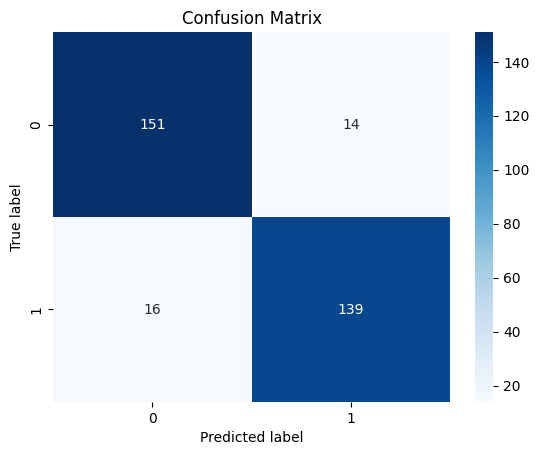

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

pred_1 = lr.predict(cv.transform(x_test))
print(classification_report(y_test, pred_1))

# Generate the confusion matrix
cm = confusion_matrix(y_test, pred_1)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
pred_2=svm.predict(cv.transform(x_test))
score_2=accuracy_score(y_test,pred_2)

In [ ]:
score_2

0.88125

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       165
           1       0.90      0.85      0.87       155

    accuracy                           0.88       320
   macro avg       0.88      0.88      0.88       320
weighted avg       0.88      0.88      0.88       320



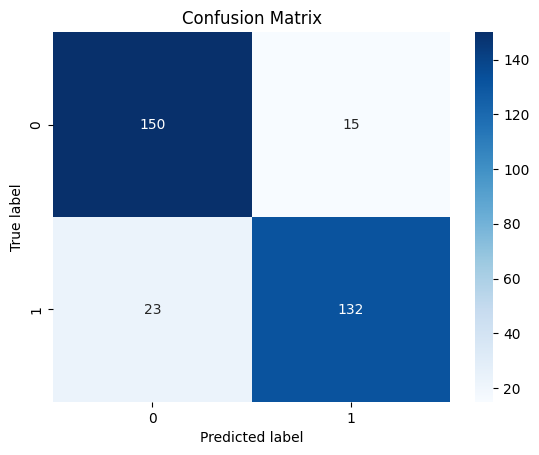

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the classification report
print(classification_report(y_test, pred_2))

# Generate the confusion matrix
cm = confusion_matrix(y_test, pred_2)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_train,y_train)
pred_3=nb.predict(cv.transform(x_test))
score_3=accuracy_score(y_test,pred_3)

In [ ]:
score_3

0.91875

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       165
           1       0.97      0.86      0.91       155

    accuracy                           0.92       320
   macro avg       0.93      0.92      0.92       320
weighted avg       0.92      0.92      0.92       320



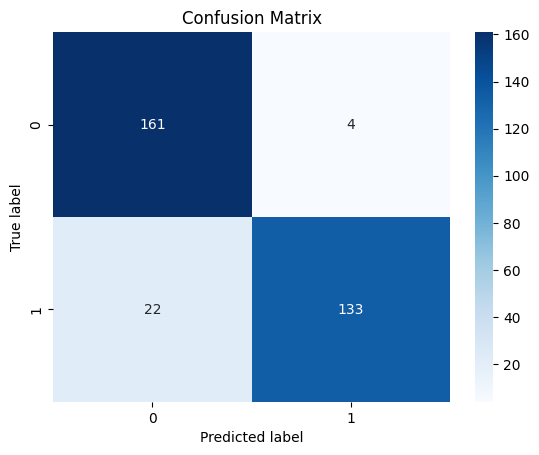

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the classification report
print(classification_report(y_test, pred_3))

# Generate the confusion matrix
cm = confusion_matrix(y_test, pred_3)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

# **Save the model**

In [ ]:
filename = "Deceptive_Opinion_model.sav"
countvectorizer = "Count_Vectorizer_model.sav"

In [ ]:
import pickle

In [ ]:
pickle.dump(lr, open(filename, "wb"))
pickle.dump(cv, open(countvectorizer, "wb"))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Load the models
loaded_model = pickle.load(open('Deceptive_Opinion_model.sav', 'rb'))
cv_model = pickle.load(open('Count_Vectorizer_model.sav', 'rb'))

# Define the input data
input_data = ["triple a rate with upgrade to view room was"]

# Transform the input data using the Count Vectorizer
input_data_transformed = cv_model.transform(input_data)

# Make predictions using the loaded model
predictions = loaded_model.predict(input_data_transformed)
print(predictions)
# Output the predic

if(predictions == 1):
  print("The review is Truthful")
else:
  print("The review is Deceptive")


[1]
The review is Truthful


Ensemble Accuracy: 0.90625
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       165
           1       0.92      0.88      0.90       155

    accuracy                           0.91       320
   macro avg       0.91      0.91      0.91       320
weighted avg       0.91      0.91      0.91       320



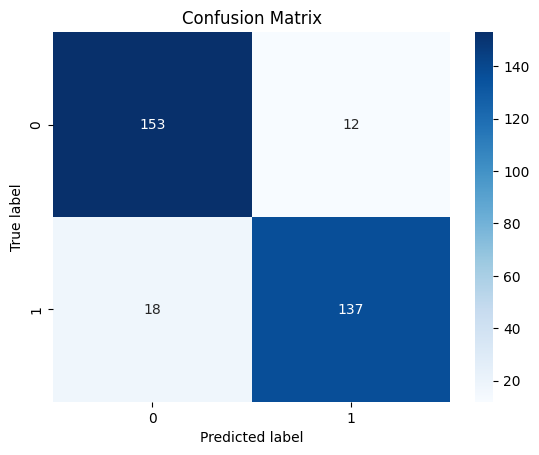

In [ ]:
from sklearn.ensemble import VotingClassifier

# Create a list of base models
estimators = list()

estimators.append(('Logistic', lr))
estimators.append(('SVM', svm))
estimators.append(('Naive Bayes', nb))

# Create the ensemble model
ensemble = VotingClassifier(estimators)

# Train the ensemble model
ensemble.fit(x_train, y_train)

x_test_transformed = cv_model.transform(x_test)

# Make predictions on the test set
predictions = ensemble.predict(x_test_transformed)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, predictions)
print('Ensemble Accuracy:', accuracy)

# Generate the classification report
print(classification_report(y_test, predictions))

# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()